In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from diagram_utils import *
import sys
import os

# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

import dagology as dag

In [4]:
%matplotlib inline

In [7]:
N = 30
D = 2
R = dag.minkowski_interval(N, D)
R = np.random.random((N, D))
G_ = dag.causal_set_graph(R)
G = transitive_reduction(G_)
nx.set_node_attributes(G, nx.get_node_attributes(G_, 'position'), 'position')
LP = nx.dag_longest_path(G)

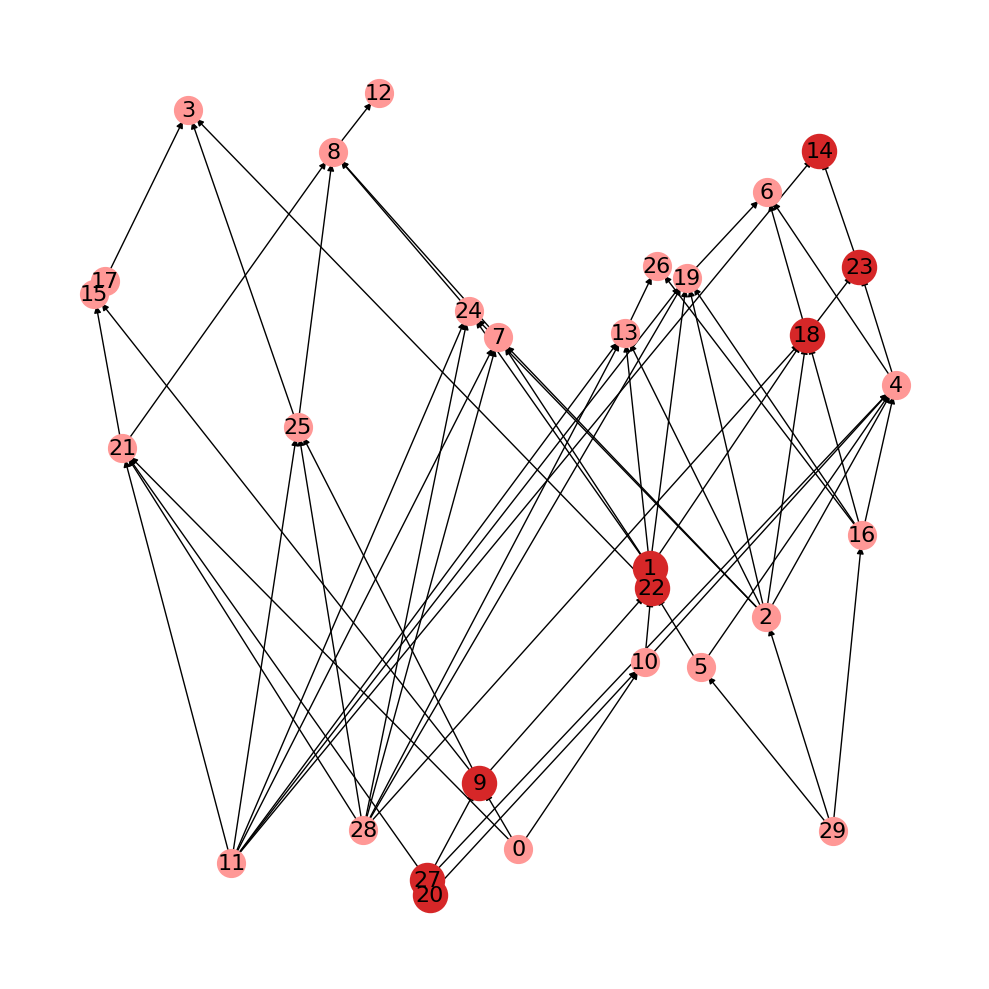

In [50]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

pos = {i:G.nodes[i]['position'][::-1] for i in G.nodes()}
nx.draw_networkx_nodes(G, pos, nodelist=[x for x in G.nodes() if x not in LP], 
                       node_size=400, node_color=tableau20[7])
nx.draw_networkx_nodes(G, pos, nodelist=LP, 
                       node_size=600, node_color=tableau20[6])
nx.draw_networkx_edges(G, pos)

labels = {i:i for i in G.nodes()}
nx.draw_networkx_labels(G,pos,labels,font_size=16)

ax.set_xticks([])
ax.set_yticks([])
plt.axis('off')
figure_path = './figures/LP'
plt.tight_layout()
# for ending in ['.eps', '.pdf', '.png']:
#     plt.savefig(figure_path + ending)
plt.show()